In [2]:
import numpy as np
import matplotlib.pyplot as plt
import comp_module as cm
import opt_algos as oa

In [3]:
def ljpot(r):
    eps = 4.0
    sigm = 2.5
    a = (sigm / r)**2
    return 4 * eps * (a**6 - a**3)

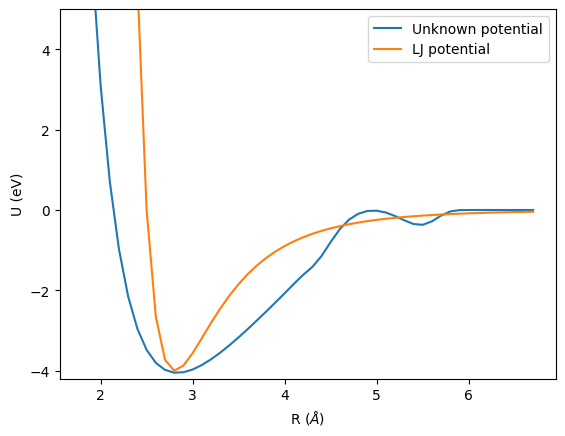

In [4]:
pair_pot = np.loadtxt("lmp_runs/Lead_dimer_data/pe_r_dimer.txt", skiprows=1)

plt.plot(pair_pot[:, 0], pair_pot[:, 1], label="Unknown potential")
plt.plot(pair_pot[:, 0], ljpot(pair_pot[:, 0]), label="LJ potential")
plt.ylim([-4.2, 5.0])
plt.xlabel(r"R ($\AA$)")
plt.ylabel("U (eV)")
plt.legend()

In [5]:
str_valid  = cm.Structure.read_from_dump("lmp_runs/Lead_liquid_data/dump.Lead.40000")

In [6]:
eps_arr = np.linspace(0.0, 4.0, 41)
sigm_arr = np.linspace(2.0, 4.0, 21)

f_rmse_arr = []

for eps in eps_arr:
    temp_arr = []
    for sigm in sigm_arr:
        temp_arr.append(cm.forces_rmse(structure=str_valid, eps=eps, sigma=sigm))
    f_rmse_arr.append(temp_arr)

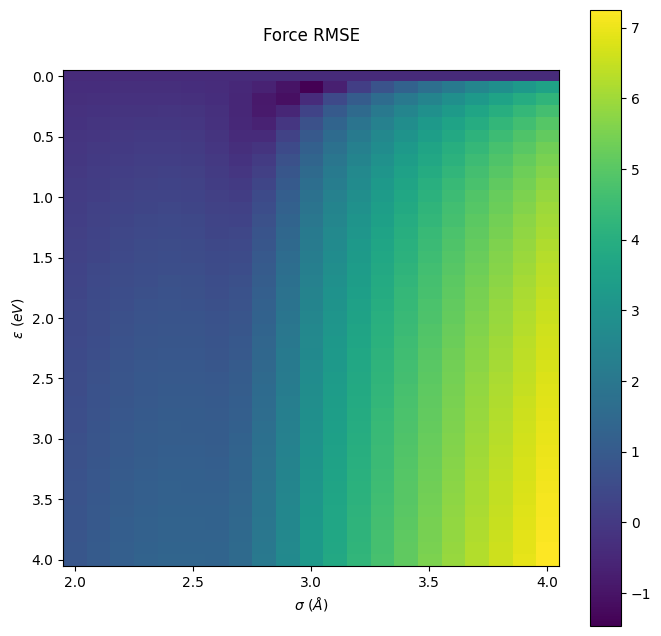

In [7]:
fig, ax = plt.subplots(figsize=(8, 8))
im = ax.imshow(np.log(np.array(f_rmse_arr)), label="Force RMSE")

nevery=5
xticks = np.arange(len(sigm_arr))[::nevery]
xtick_labels = [f'{x:1.1f}' for x in sigm_arr[::nevery]]
yticks = np.arange(len(eps_arr))[::nevery]
ytick_labels = [f'{x:1.1f}' for x in eps_arr[::nevery]]
ax.set_xticks(xticks, labels=xtick_labels)
ax.set_yticks(yticks, labels=ytick_labels)

cbar = ax.figure.colorbar(im, ax=ax)
cbar.ax.set_ylabel("", rotation=90, va="bottom")

ax.set_xlabel(r"$\sigma~(\AA)$")
ax.set_ylabel(r"$\varepsilon~(eV)$")
ax.set_title("Force RMSE\n")
ax.set_aspect(len(sigm_arr) / len(eps_arr))

In [8]:
def f_loss_func(params):
    return cm.forces_rmse(structure=str_valid, eps=params[0], sigma=params[1], rcut=6.0)

In [9]:
params_arr = oa.pseudo_gradient(f_loss_func, np.array([2.0, 3.5]), np.array([[0.01, 3.0], [2.0, 4.0]]), n_iter=300)

In [10]:
params_arr

array([[2.  , 3.5 ],
       [1.99, 3.49],
       [1.98, 3.48],
       [1.97, 3.47],
       [1.96, 3.46],
       [1.95, 3.45],
       [1.94, 3.44],
       [1.93, 3.43],
       [1.92, 3.42],
       [1.91, 3.41],
       [1.9 , 3.4 ],
       [1.89, 3.39],
       [1.88, 3.38],
       [1.87, 3.37],
       [1.86, 3.36],
       [1.85, 3.35],
       [1.84, 3.34],
       [1.83, 3.33],
       [1.82, 3.32],
       [1.81, 3.31],
       [1.8 , 3.3 ],
       [1.79, 3.29],
       [1.78, 3.28],
       [1.77, 3.27],
       [1.76, 3.26],
       [1.75, 3.25],
       [1.74, 3.24],
       [1.73, 3.23],
       [1.72, 3.22],
       [1.71, 3.21],
       [1.7 , 3.2 ],
       [1.69, 3.19],
       [1.68, 3.18],
       [1.67, 3.17],
       [1.66, 3.16],
       [1.65, 3.15],
       [1.64, 3.14],
       [1.63, 3.13],
       [1.62, 3.12],
       [1.61, 3.11],
       [1.6 , 3.1 ],
       [1.59, 3.09],
       [1.58, 3.08],
       [1.57, 3.07],
       [1.56, 3.06],
       [1.55, 3.05],
       [1.54, 3.04],
       [1.53,

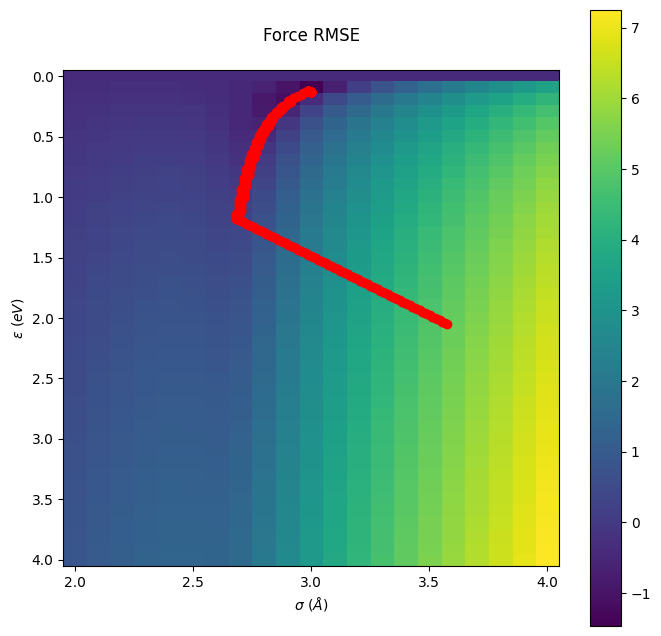

In [11]:
fig, ax = plt.subplots(figsize=(8, 8))
im = ax.imshow(np.log(np.array(f_rmse_arr)), label="Force RMSE")

nevery=5
xticks = np.arange(len(sigm_arr))[::nevery]
xtick_labels = [f'{x:1.1f}' for x in sigm_arr[::nevery]]
yticks = np.arange(len(eps_arr))[::nevery]
ytick_labels = [f'{x:1.1f}' for x in eps_arr[::nevery]]
ax.set_xticks(xticks, labels=xtick_labels)
ax.set_yticks(yticks, labels=ytick_labels)

cbar = ax.figure.colorbar(im, ax=ax)
cbar.ax.set_ylabel("", rotation=90, va="bottom")

ax.set_xlabel(r"$\sigma~(\AA)$")
ax.set_ylabel(r"$\varepsilon~(eV)$")
ax.set_title("Force RMSE\n")
ax.set_aspect(len(sigm_arr) / len(eps_arr))

grad_eps = (np.array(params_arr)[:, 0] - min(eps_arr)) / (max(eps_arr - min(eps_arr))) * len(eps_arr)
grad_sigm = (np.array(params_arr)[:, 1] - min(sigm_arr)) / (max(sigm_arr - min(sigm_arr))) * len(sigm_arr)
plt.plot(grad_sigm, grad_eps, 'ro')

In [12]:
print(f"Eps = {params_arr[-1][0]:.2f} eV\nSigma = {params_arr[-1][1]:.2f} A")

Eps = 0.12 eV
Sigma = 2.94 A


In [13]:
x = np.linspace(0.0, 10.0, 1000)

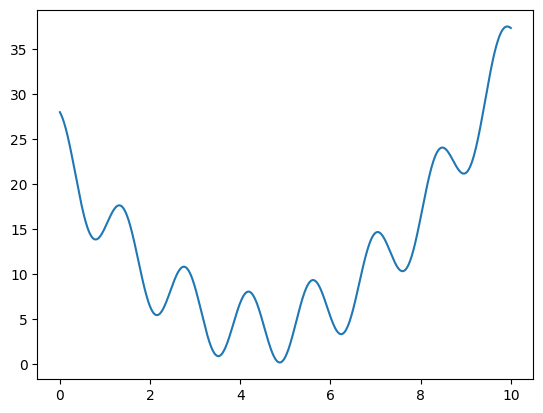

In [14]:
a = 4.5
f = lambda x: 4 * np.cos(a*x) + 0.05 * (a*x)**2 - 2*(a*x) + 24
plt.plot(x, f(x))

In [15]:
params_arr = oa.pseudo_gradient(f, np.array([8.3]), borders=np.array([[0.0, 10.0]]), n_iter=100)

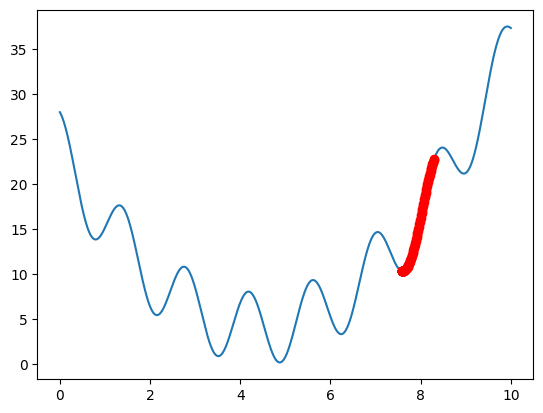

In [16]:
plt.plot(x, f(x))
plt.plot(params_arr, f(np.array(params_arr)), 'ro')
plt.show()

# Simulated annealing

In [5]:
params_arr, acc_arr = oa.simulated_annealing(f,np.array([8.0]), np.array([[0.0, 10.0]]), n_iter=500, Tinit=1.0, step_size=0.8)

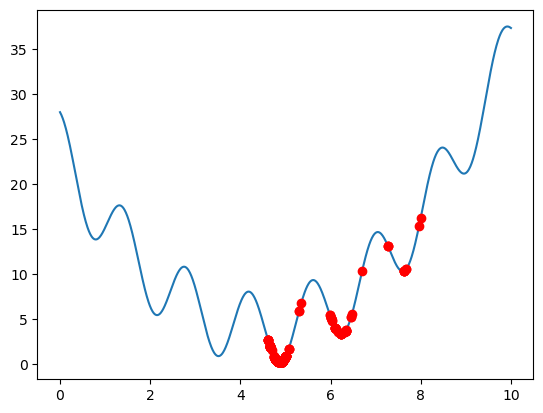

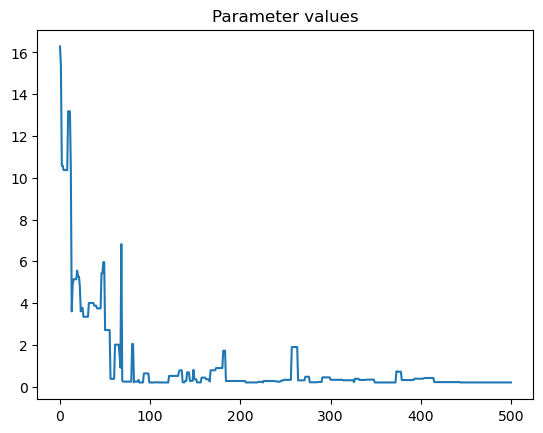

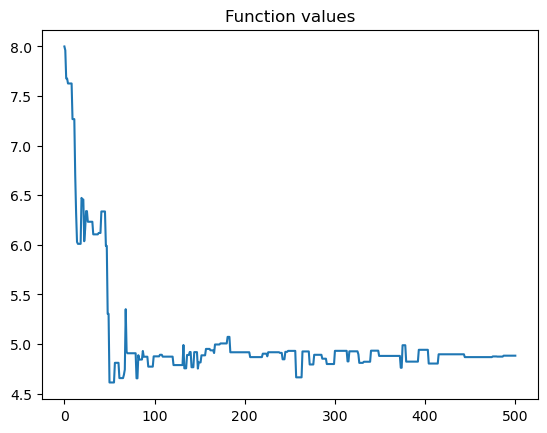

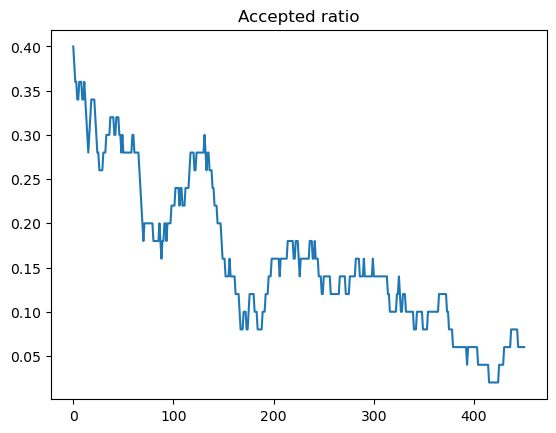

In [6]:
plt.plot(x, f(x))
plt.plot(params_arr, f(np.array(params_arr)), 'ro')
plt.show()

plt.plot(f(np.array(params_arr)))
plt.title("Parameter values")
plt.show()

plt.plot(params_arr)
plt.title("Function values")
plt.show()

plt.plot([(acc_arr[i+50] - acc_arr[i]) / 50 for i in range(len(acc_arr)-50)])
plt.title("Accepted ratio")
plt.show()

# Differentail Evolution

In [51]:
res = np.array(list(oa.diff_evo(f, bounds=[[0, 10]], popsize=4, n_iter=200)))
# params, loss

Text(0.5, 0, 'Population number')

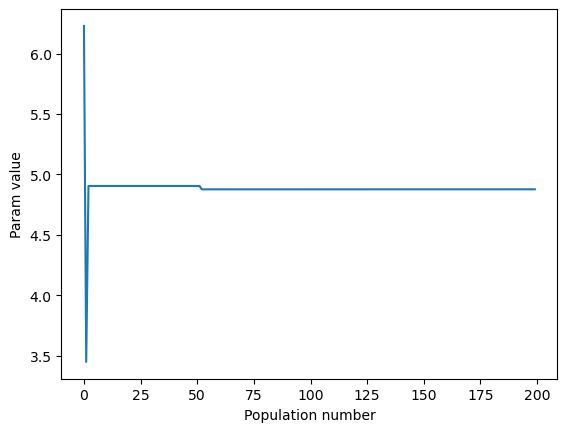

In [52]:
# We plot just the best item
plt.plot(res[:, 0])
plt.ylabel("Param value")
plt.xlabel("Population number")

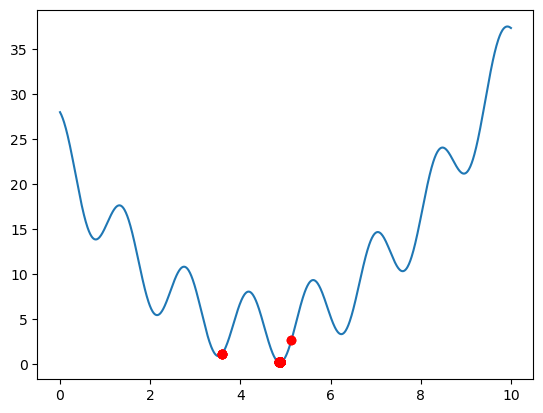

In [50]:
plt.plot(x, f(x))
plt.plot(res[:, 0], f(res[:, 0]), 'ro')
plt.show()